In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import table
from sklearn import datasets
import seaborn as sns 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

np.random.seed(42)

1) Скачайте данные с Kaggle - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv

2) Как всегда - базовые статистики, визуализации (распределения, корреляции, pair-plots). В тех графиках, которые это позволяют, раскрасьте значения в зависимости от того, является опухоль злокачественной или нет.

3) Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, во время предобработки, уберите переменные, корреляция пирсона между которыми превышает 0.85. Разбейте данные на train-test, отложив 30% выборки для тестирования. Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. 

4) Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.

5) Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :) 

Бонусное задание - постройте также модель KNN с настройкой числа соседей на CV. У какой модели качество оказалось выше? 

In [2]:
df = pd.read_csv('data/data.csv', index_col='id')
print('Размер выборки:', df.shape) #check size
df.head( )

Размер выборки: (569, 32)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#just want to check are indexes unic
df[df.index.duplicated(keep=False)] #Seems to be fine

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
#diagnosis is the only categorical feature
np.unique(df['diagnosis'])

array(['B', 'M'], dtype=object)

malignant - злокачественная
benign - доброкачественная

In [7]:
# finding nulls
df.isnull().sum()
#that's it - Unnamed: 32 

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [8]:
df = df.drop(columns=['Unnamed: 32'])

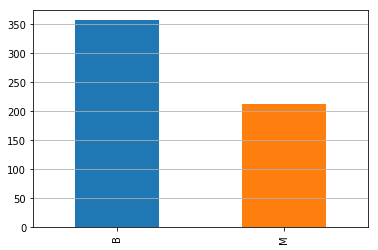

In [9]:
#Let's see the density 
df['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [10]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

нуууу примерно 60 на 40.

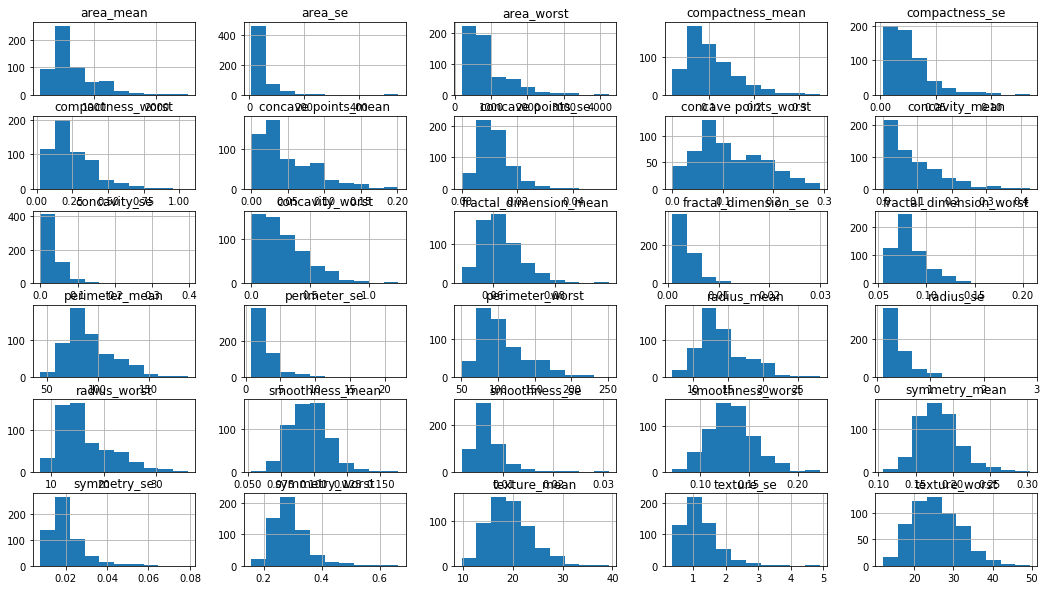

In [11]:
df.hist(figsize=(18, 10));

In [ ]:
#correlation map
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [ ]:
sns.pairplot(df, hue='diagnosis');
#oh shi.....

In [12]:
#ok, let's start thinking about droping features
correlations = df.corr()
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i].abs() > 0.85]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])

0.9978552814938113    radius_mean    perimeter_mean
0.9873571700566119    radius_mean    area_mean
0.9695389726112053    radius_mean    radius_worst
0.9651365139559878    radius_mean    perimeter_worst
0.9410824595860459    radius_mean    area_worst
0.9120445888404215    texture_mean    texture_worst
0.9865068039913906    perimeter_mean    area_mean
0.8509770412528199    perimeter_mean    concave points_mean
0.9694763634663142    perimeter_mean    radius_worst
0.9703868870426388    perimeter_mean    perimeter_worst
0.9415498080023057    perimeter_mean    area_worst
0.9627460860470841    area_mean    radius_worst
0.959119574355266    area_mean    perimeter_worst
0.9592133256499006    area_mean    area_worst
0.8831206701772499    compactness_mean    concavity_mean
0.8658090398022638    compactness_mean    compactness_worst
0.9213910263788594    concavity_mean    concave points_mean
0.8841026390943831    concavity_mean    concavity_worst
0.8613230336379504    concavity_mean    concave poi

нужно исследовать подробно переменные
<br>
a) radius (mean of distances from center to points on the perimeter)
<br>
b) texture (standard deviation of gray-scale values)
<br>
c) perimeter
<br>
d) area
<br>
e) smoothness (local variation in radius lengths)
<br>
f) compactness (perimeter^2 / area - 1.0)
<br>
g) concavity (severity of concave portions of the contour)
<br>
h) concave points (number of concave portions of the contour)
<br>
i) symmetry
<br>
j) fractal dimension ("coastline approximation" - 1)
<br>
<br>
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [13]:
mean = ['diagnosis','radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 
        'concave points_mean', 'symmetry_mean', 'smoothness_mean', 'fractal_dimension_mean','texture_mean']
worst = ['diagnosis','radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
        'concave points_worst', 'symmetry_worst', 'smoothness_worst', 'fractal_dimension_worst', 'texture_worst']
se = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
     'concave points_se', 'symmetry_se', 'fractal_dimension_se']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18beb2e8>,
      dtype=object)

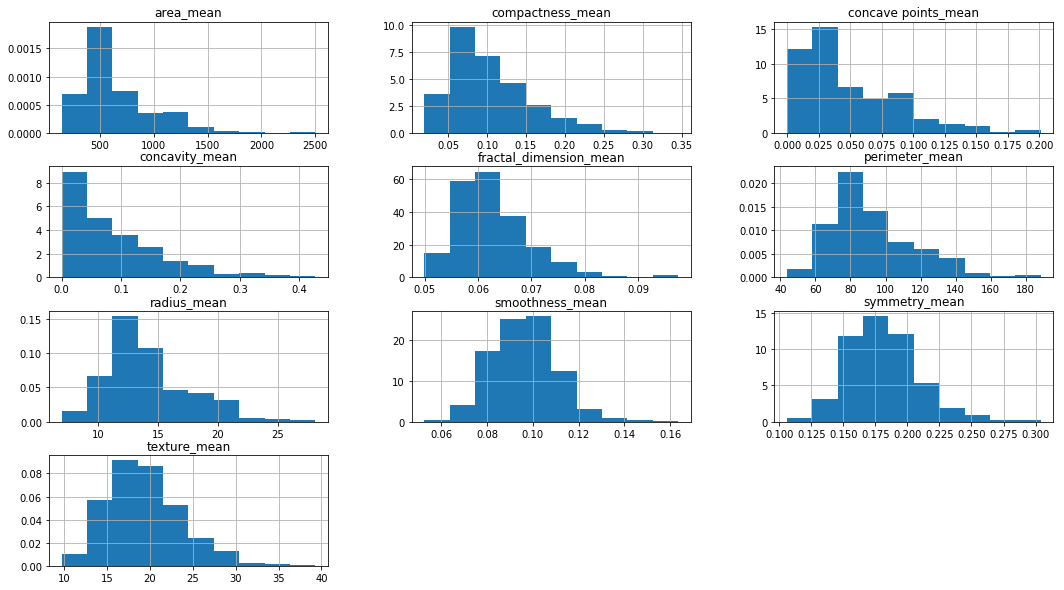

In [14]:
df[mean].hist(figsize=(18,10), density=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18372dd8>,
      dtype=object)

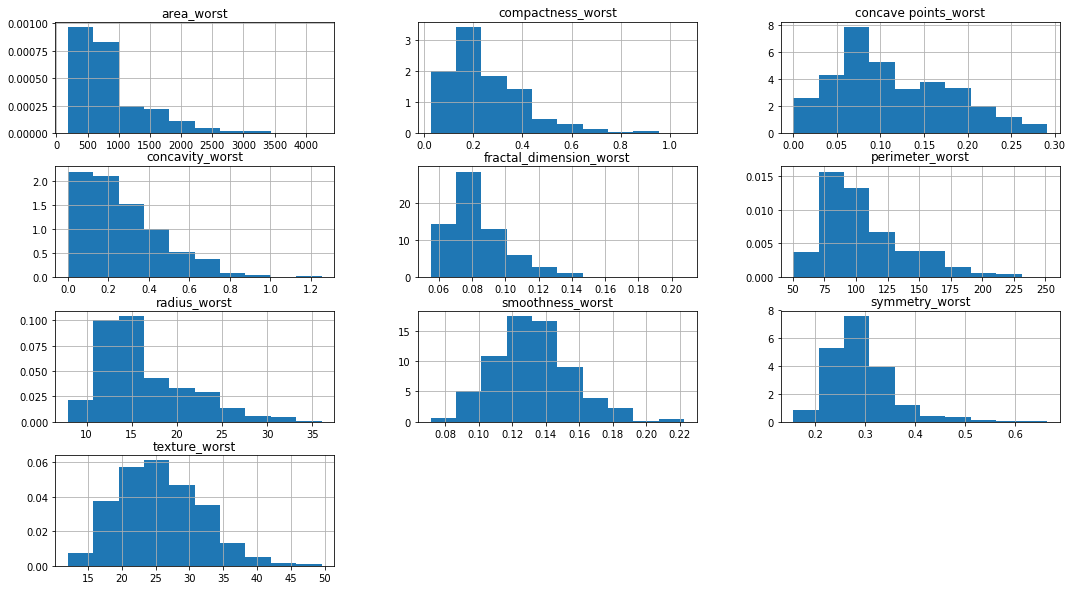

In [33]:
df[worst].hist(figsize=(18,10), density=True)

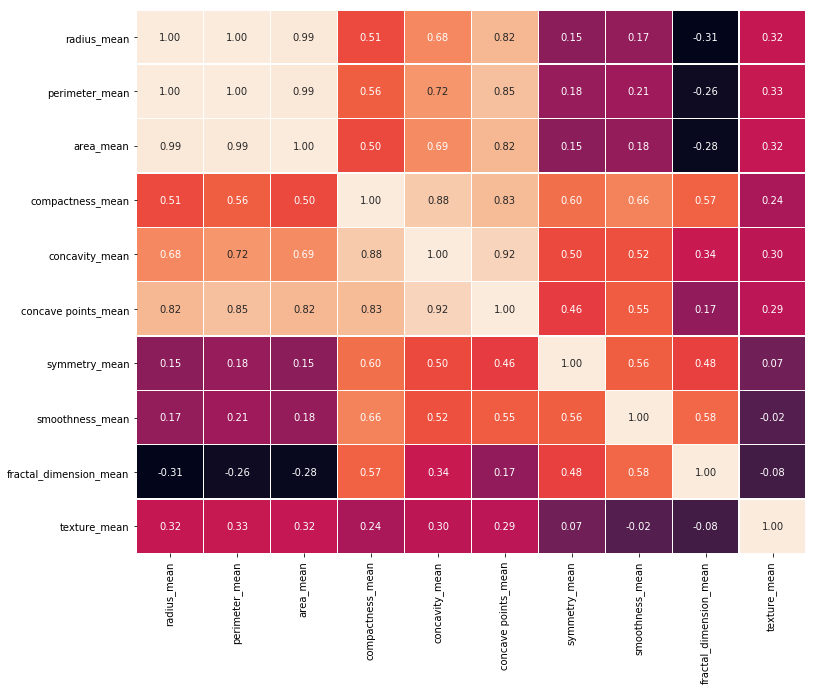

In [15]:
#correlation map of mean features
plt.figure(figsize=(12, 10))
sns.heatmap(df[mean].corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [16]:
correlations = df[mean].corr()
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i].abs() > 0.85]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])

0.9978552814938113    radius_mean    perimeter_mean
0.9873571700566119    radius_mean    area_mean
0.9865068039913906    perimeter_mean    area_mean
0.8509770412528199    perimeter_mean    concave points_mean
0.8831206701772499    compactness_mean    concavity_mean
0.9213910263788594    concavity_mean    concave points_mean


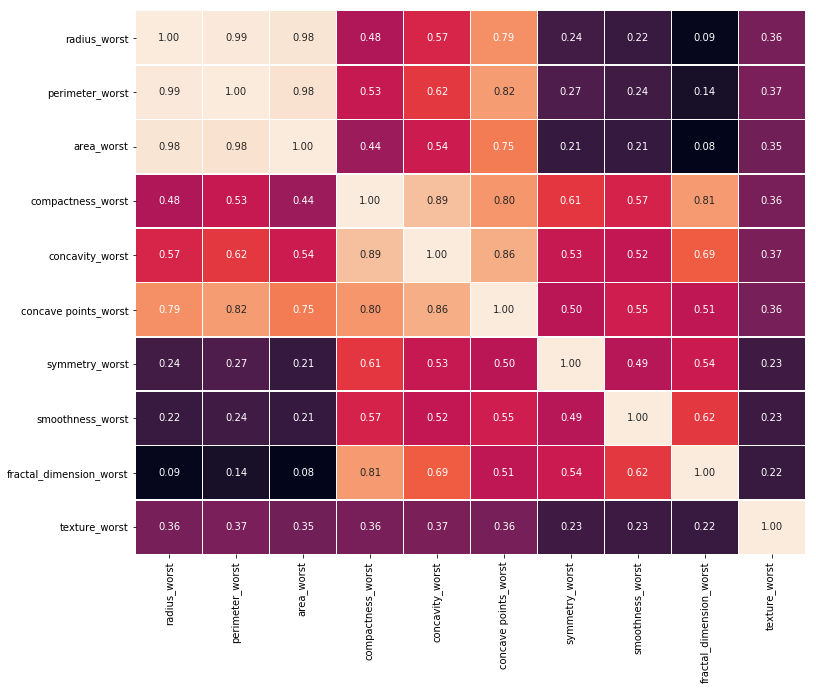

In [17]:
#correlation map of worst features
plt.figure(figsize=(12, 10))
sns.heatmap(df[worst].corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [18]:
correlations = df[worst].corr()
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i].abs() > 0.85]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])

0.993707916102951    radius_worst    perimeter_worst
0.9840145644590724    radius_worst    area_worst
0.9775780914063881    perimeter_worst    area_worst
0.8922608987764692    compactness_worst    concavity_worst
0.8554338603439984    concavity_worst    concave points_worst


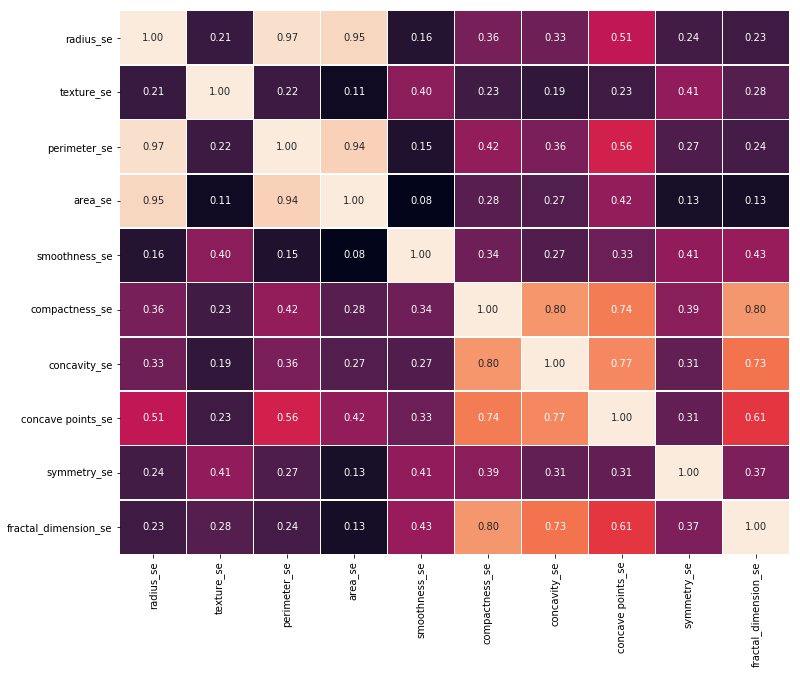

In [19]:
#correlation map of se features
plt.figure(figsize=(12, 10))
sns.heatmap(df[se].corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [20]:
correlations = df[se].corr()
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i].abs() > 0.85]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])

0.9727936770160752    radius_se    perimeter_se
0.95183011211099    radius_se    area_se
0.9376554069544158    perimeter_se    area_se


In [25]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se',
             'texture_worst','area_worst','concavity_se','concavity_worst']

df_drop = df.drop(drop_list, axis = 1)
df_drop.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,
842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.03003,0.006193,0.1622,0.4601,0.11890
842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01389,0.003532,0.1238,0.2750,0.08902
84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.02250,0.004571,0.1444,0.3613,0.08758
84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05963,0.009208,0.2098,0.6638,0.17300
84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.01756,0.005115,0.1374,0.2364,0.07678


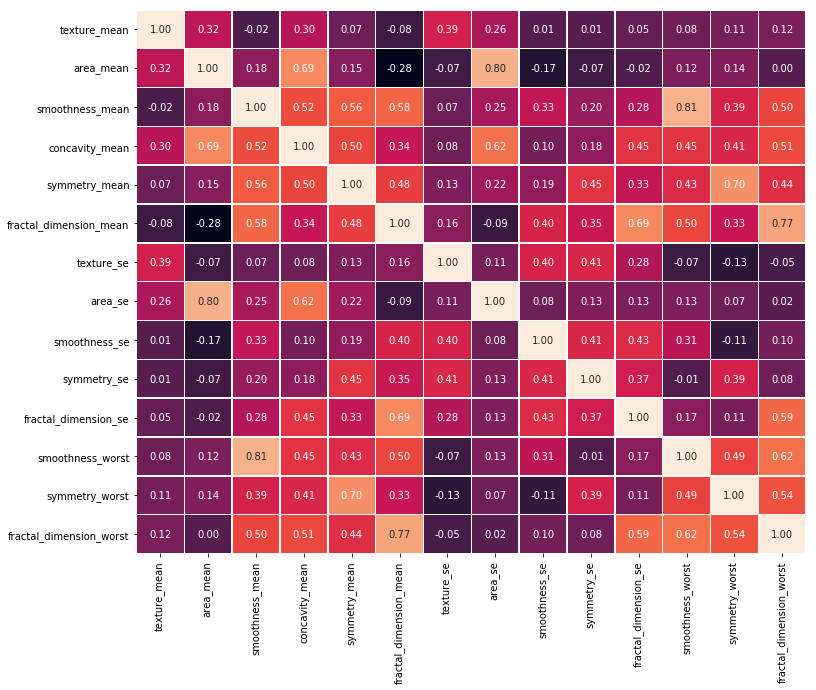

In [26]:
#correlation map of df_drop features
plt.figure(figsize=(12, 10))
sns.heatmap(df_drop.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  retu

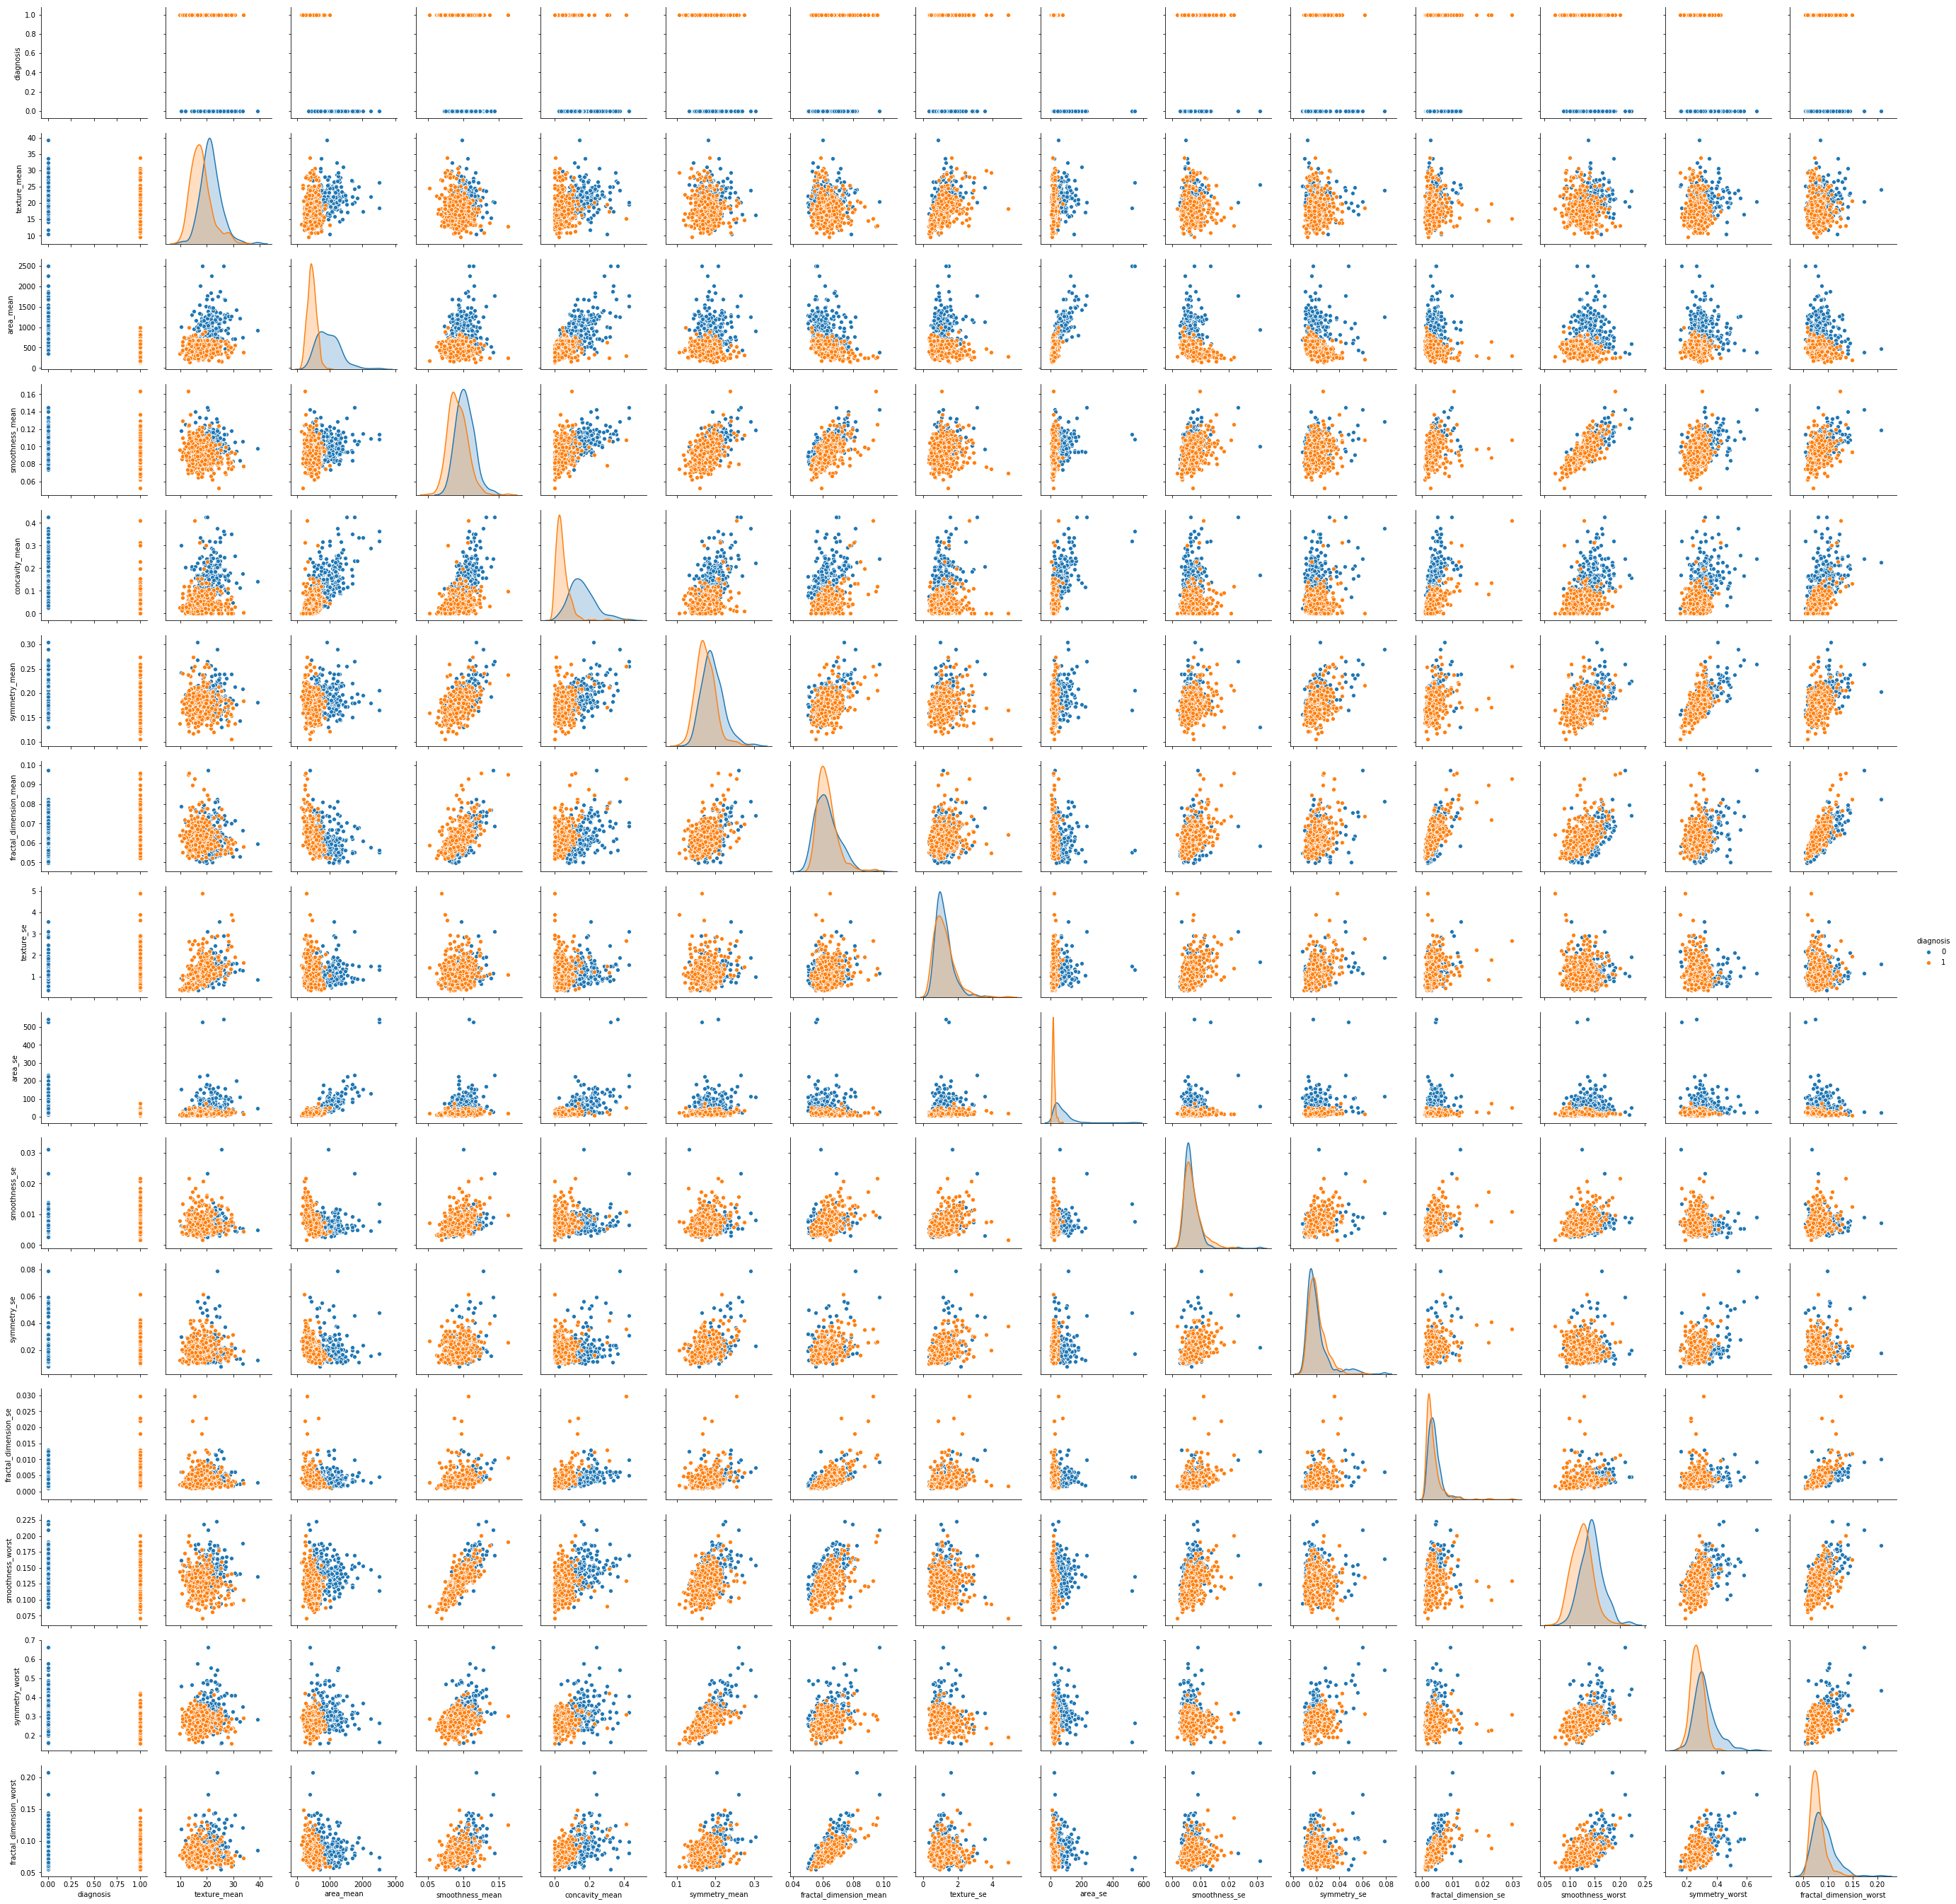

In [41]:
sns.pairplot(df_drop, hue='diagnosis');

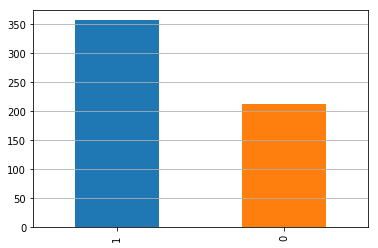

In [27]:
#Ok, I think it's time to decode diagnosis
#malignant - 0
#benign - 1
df_drop['diagnosis'] = df_drop['diagnosis'].apply(lambda x: 1 if x=='B' else 0)

#Let's see the density 
df_drop['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [28]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [29]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_drop.drop(['diagnosis'], axis=1), df_drop['diagnosis'], test_size=0.20, random_state=42)

#стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# учим knn
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.921
Precision: 0.986
Recall: 0.898
f1_score: 0.940

Test quality:
Accuracy: 0.947
Precision: 1.000
Recall: 0.922
f1_score: 0.959


In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.978
Precision: 0.993
Recall: 0.973
f1_score: 0.983

Test quality:
Accuracy: 0.974
Precision: 0.972
Recall: 0.986
f1_score: 0.979


/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


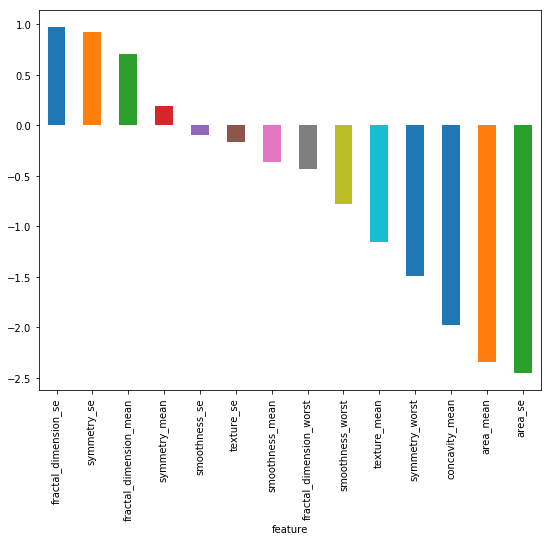

In [32]:
featureImportance = pd.DataFrame({"feature": df_drop.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(9, 7));

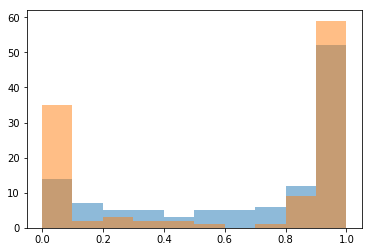

In [37]:
plt.hist(knn.predict_proba(X_test_scaled)[:, 1], alpha=0.5);
plt.hist(log_reg.predict_proba(X_test_scaled)[:, 1], alpha=0.5);

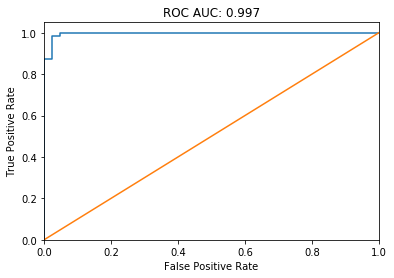

In [38]:
# подгружаем из пакета метрику roc_auc 
# и функцию для строительства кривой
from sklearn.metrics import roc_auc_score, roc_curve

# перебираем пороги и ищем для каждого fpr и tpr: 
prediction = log_reg.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prediction)
auc_score = roc_auc_score(y_test, prediction)
# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC: {:.3f}'.format(auc_score))
plt.show()

In [39]:
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

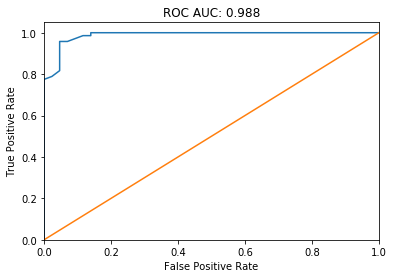

In [40]:
plot_roc_curve(knn.predict_proba(X_test_scaled)[:,1], y_test)

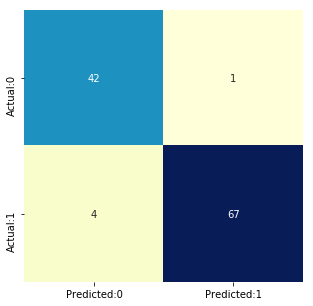

In [44]:
from sklearn.metrics import confusion_matrix

#

cm = confusion_matrix(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]>0.8)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);